In [6]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

fatal: destination path 'PyPortfolioOpt' already exists and is not an empty directory.


In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [8]:
tickers = ["TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI"]

In [9]:
stock_data = yf.download(tickers, period="10y")

[*********************100%%**********************]  12 of 12 completed


In [31]:
prices = pd.DataFrame(stock_data["Adj Close"].dropna(how="all"))
prices.tail()

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2023-11-01,11.14,104.970001,190.000000,81.070000,114.930000,64.910004,0.070,423.250000,244.860001,51.660000,205.660004,43.830002
2023-11-02,11.40,107.050003,192.979996,83.290001,117.809998,65.690002,0.075,435.059998,250.360001,55.060001,218.509995,46.480000
2023-11-03,11.98,109.660004,197.869995,85.070000,119.540001,65.230003,0.075,450.049988,243.529999,56.099998,219.960007,47.750000
2023-11-06,11.66,108.400002,195.520004,84.019997,119.639999,64.980003,0.075,457.510010,237.000000,54.619999,219.270004,48.139999
2023-11-07,11.75,108.010002,198.250000,84.589996,119.209999,64.199997,0.075,459.549988,242.080002,54.630001,222.179993,49.919998


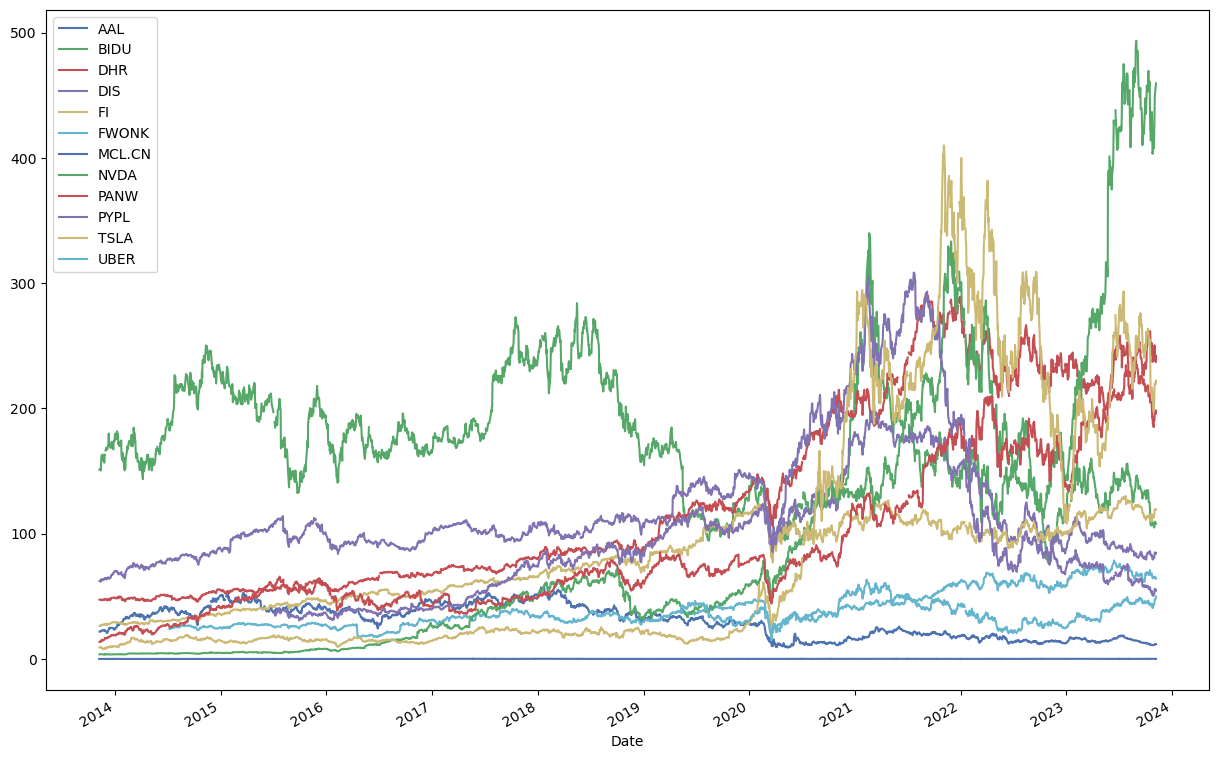

In [32]:
prices[prices.index >= "2013-01-01"].plot(figsize=(15,10));

In [33]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
AAL,0.250229,0.057074,0.025589,0.060398,0.043066,0.053278,-0.010137,0.067450,0.047184,0.055540,0.070839,0.137258
BIDU,0.057074,0.195326,0.029799,0.036921,0.034258,0.039829,0.006020,0.074788,0.049520,0.067582,0.082151,0.115214
DHR,0.025589,0.029799,0.051635,0.023306,0.027610,0.025658,0.004991,0.046207,0.031606,0.043094,0.037821,0.049699
DIS,0.060398,0.036921,0.023306,0.072068,0.035190,0.039790,0.005984,0.046339,0.036494,0.048069,0.044669,0.089683
FI,0.043066,0.034258,0.027610,0.035190,0.061510,0.036875,-0.004709,0.047734,0.032031,0.051742,0.043387,0.075234
FWONK,0.053278,0.039829,0.025658,0.039790,0.036875,0.118746,-0.001074,0.054647,0.040119,0.045221,0.051216,0.086993
MCL.CN,-0.010137,0.006020,0.004991,0.005984,-0.004709,-0.001074,3.540795,0.000172,-0.015144,0.005864,0.009519,0.028742
NVDA,0.067450,0.074788,0.046207,0.046339,0.047734,0.054647,0.000172,0.210942,0.071776,0.095926,0.105967,0.136801
PANW,0.047184,0.049520,0.031606,0.036494,0.032031,0.040119,-0.015144,0.071776,0.147541,0.063006,0.075823,0.090691
PYPL,0.055540,0.067582,0.043094,0.048069,0.051742,0.045221,0.005864,0.095926,0.063006,0.146519,0.088916,0.118218


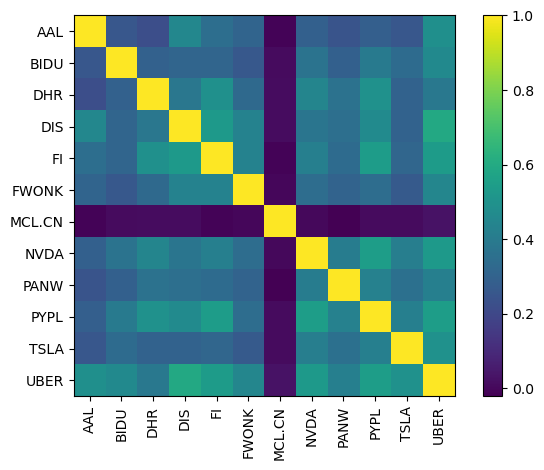

In [34]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [35]:
mu = expected_returns.capm_return(prices)
mu

AAL       0.304140
BIDU      0.283744
DHR       0.153678
DIS       0.196153
FI        0.178774
FWONK     0.218946
MCL.CN    1.418713
NVDA      0.338956
PANW      0.247274
PYPL      0.302310
TSLA      0.378790
UBER      0.520011
Name: mkt, dtype: float64

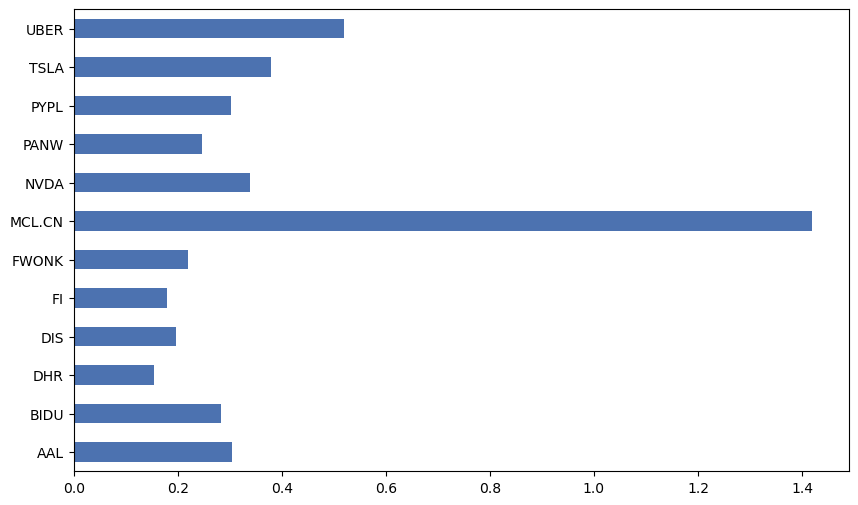

In [36]:
mu.plot.barh(figsize=(10,6));

Portfolio Allocation


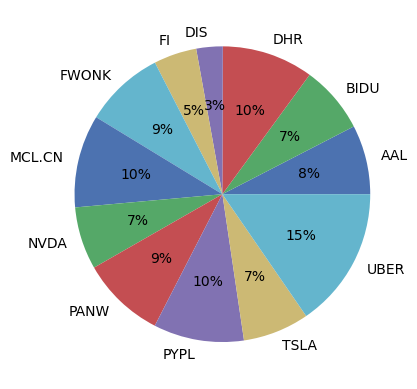

In [37]:
ef = EfficientFrontier(mu,sample_cov)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [38]:
cleaned_weights

OrderedDict([('AAL', 0.07576),
             ('BIDU', 0.07384),
             ('DHR', 0.09993),
             ('DIS', 0.02889),
             ('FI', 0.047),
             ('FWONK', 0.08743),
             ('MCL.CN', 0.10144),
             ('NVDA', 0.06844),
             ('PANW', 0.09172),
             ('PYPL', 0.09893),
             ('TSLA', 0.07254),
             ('UBER', 0.15408)])

In [39]:
latest_prices = prices.iloc[-1] #prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Funds remaining: 25.66
AAL: allocated 0.076, desired 0.076
BIDU: allocated 0.073, desired 0.074
DHR: allocated 0.099, desired 0.100
DIS: allocated 0.029, desired 0.029
FI: allocated 0.047, desired 0.047
FWONK: allocated 0.087, desired 0.087
MCL.CN: allocated 0.101, desired 0.101
NVDA: allocated 0.069, desired 0.068
PANW: allocated 0.092, desired 0.092
PYPL: allocated 0.099, desired 0.099
TSLA: allocated 0.073, desired 0.073
UBER: allocated 0.154, desired 0.154
Allocation has RMSE: 0.000
Discrete allocation performed with $25.66 leftover


{'AAL': 645,
 'BIDU': 68,
 'DHR': 50,
 'DIS': 34,
 'FI': 39,
 'FWONK': 136,
 'MCL.CN': 135259,
 'NVDA': 15,
 'PANW': 38,
 'PYPL': 181,
 'TSLA': 33,
 'UBER': 309}

In [40]:
ef.portfolio_performance(verbose=True);

Expected annual return: 42.0%
Annual volatility: 32.2%
Sharpe Ratio: 1.24


In [65]:
idx = pd.date_range( start='2013-01-01',end='2023-12-31', freq='M')

stock_data_pctchange = prices.pct_change().cumsum()

stock_data_pctchange.dropna(how="all")


,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2013-11-08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2013-11-11,0.002585,0.003376,-0.003217,-0.003499,-0.002272,NaN,0.000000,0.008355,0.021469,NaN,0.048931,NaN
2013-11-12,0.013329,-0.004342,-0.009403,-0.011840,0.000100,NaN,0.000000,0.010267,0.007377,NaN,0.001246,NaN
2013-11-13,0.004400,0.012609,-0.011297,0.005867,0.014869,NaN,0.000000,0.037621,0.011496,NaN,0.007777,NaN
2013-11-14,0.019415,0.051895,-0.002079,0.021091,0.014962,NaN,0.000000,0.041955,0.029590,NaN,-0.000154,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,0.569564,0.609014,1.650263,0.627254,1.784464,1.574206,16.688968,5.815557,3.639530,0.965526,4.668689,0.760080
2023-11-02,0.592903,0.628829,1.665947,0.654638,1.809523,1.586223,16.760397,5.843460,3.661992,1.031341,4.731171,0.820540
2023-11-03,0.643780,0.653211,1.691286,0.676009,1.824207,1.579220,16.760397,5.877915,3.634712,1.050229,4.737807,0.847864


In [54]:
stock_data_pctchange.columns

Index(['AAL', 'BIDU', 'DHR', 'DIS', 'FI', 'FWONK', 'MCL.CN', 'NVDA', 'PANW',
       'PYPL', 'TSLA', 'UBER'],
      dtype='object')

In [61]:
stock_data_pctchange.hvplot.line(
    xlabel="Year", 
    ylabel="Daily Return",
    title="Value"
)

#years timeline code dt 

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [63]:
bar_chart=pd.DataFrame(mu)

bar_chart
# Use hvplot.bar to create bar plot with categorical data


,mkt
AAL,0.304140
BIDU,0.283744
DHR,0.153678
DIS,0.196153
FI,0.178774
FWONK,0.218946
MCL.CN,1.418713
NVDA,0.338956
PANW,0.247274
PYPL,0.302310


In [64]:
bar_chart.hvplot.bar(
    x="index", 
    y="mkt", 
    color="green",
    xlabel="Ticker", 
    ylabel="Daily Return", 
    title="Daily Return",
    rot=90
)

:Bars   [index]   (mkt)